In [1]:
# Import necessary Libraries
import os
import sys, platform, os
print(sys.version)
print("--"* 60)
print("sys.platform   :", sys.platform)
print("platform.system():", platform.system())  
print("os.name :", os.name)   
# print(sys.executable)
# print("--"* 60)

3.10.18 | packaged by conda-forge | (main, Jun  4 2025, 14:42:04) [MSC v.1943 64 bit (AMD64)]
------------------------------------------------------------------------------------------------------------------------
sys.platform   : win32
platform.system(): Windows
os.name : nt


In [2]:
print("Current directory:", os.getcwd())

Current directory: C:\Users\alkas\Downloads\Cell_Cycle_updated_Files\Cell_Cycle_updated_Files\All_DATA_Code_Files


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plot_utils import set_plot_style, set_spines_black

In [4]:
# Load the data
x = np.loadtxt("DAT_Files/Ex2_Rational_SINDy.dat")
df = pd.DataFrame(x)
print("Top Five rows in the DAT File:")
print(df.head(5))
print("*"* 60)
print("Number of unique values in each column:")
print(df.nunique())


Top Five rows in the DAT File:
         0        1        2    3    4    5
0  5.00000  1.63685  1.63685  2.0  1.0  0.0
1  4.99049  1.63375  1.63375  1.0  1.0  0.0
2  4.98099  1.63064  1.63064  1.0  1.0  0.0
3  4.97148  1.62754  1.62754  1.0  1.0  0.0
4  4.96198  1.62444  1.62444  1.0  1.0  0.0
************************************************************
Number of unique values in each column:
0    1065
1    1059
2    1065
3       4
4       2
5       1
dtype: int64


In [5]:
# Columns
S = x[:, 0]         
R1 = x[:, 1]
R2 = x[:, 2]
regime = x[:, 3].astype(int)

In [6]:
# Find steady state indices for each regime (and positive R1)
ss1 = np.unique(np.where((regime == 1) & (R1 > 0))[0])
ss2 = np.unique(np.where((regime == 2) & (R1 > 0))[0]) 
ss3 = np.unique(np.where((regime == 3) & (R1 > 0))[0])
ss4 = np.unique(np.where((regime == 4) & (R1 > 0))[0])

In [7]:
# Identify Hopf parameter values from AUTO
hb_params = [1.180548] 
hb_indices = []
tol = 1e-6
for val in hb_params:
    diffs = np.abs(S - val)
    idx0  = np.argmin(diffs)
    if diffs[idx0] > tol:
        print(f"Closest match to {val} is {S[idx0]} (diff={diffs[idx0]:.2e})")
    else:
        print(f"Found Hopf at S[{idx0}] = {S[idx0]}")
    print(f"regime={regime[idx0]}, R1={R1[idx0]}")
    hb_indices.append(idx0)

print("Final Hopf indices:", hb_indices)

Closest match to 1.180548 is 1.18055 (diff=2.00e-06)
regime=2, R1=0.449451
Final Hopf indices: [np.int64(411)]


In [8]:
hopf_idx1 = 411
x_hb, y_hb = S[hopf_idx1], R1[hopf_idx1]


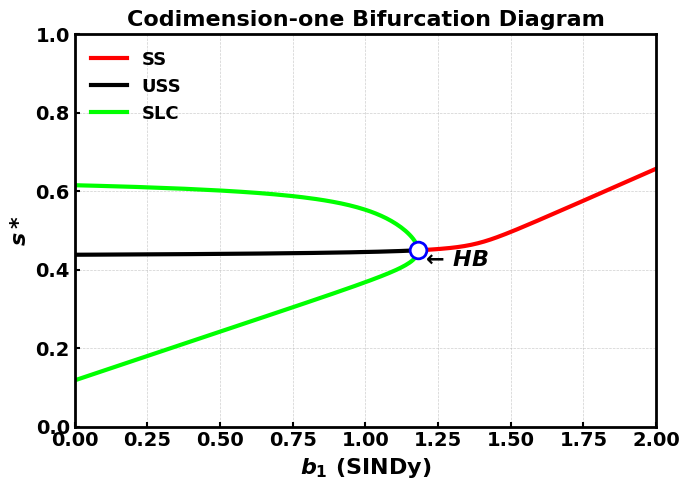

In [9]:
# Initialize Figure
set_plot_style(dpi=100)
plt.figure(figsize=(7, 5))

# Define masks explicitly
red_mask = S[ss1] >= x_hb
black_mask = S[ss2] <= x_hb

# Regime 1:
plt.plot(S[ss1][red_mask], R1[ss1][red_mask], 'r-', linewidth=3, label='SS')
# Regime 2:
plt.plot(S[ss2][black_mask], R1[ss2][black_mask], 'k-', linewidth=3, label='USS')

# Regime 3: 
neon_lime = '#00FF00'  
plt.plot(S[ss3], R1[ss3], '-', color=neon_lime, linewidth=3, label='SLC')
plt.plot(S[ss3], R2[ss3], '-', color=neon_lime, linewidth=3)

# Regime 4: 
plt.plot(S[ss4], R1[ss4],  'b-', linewidth=3.5)
plt.plot(S[ss4], R2[ss4],  'b-', linewidth=3.5)

# Mark and annotate the Hopf points 
## HB1
plt.plot(x_hb, y_hb,
         marker='o', linestyle='',
         markeredgecolor='b', markerfacecolor='white',
         markersize=12, mew=2)

plt.text(
    x_hb+0.01, y_hb-0.04,
    r'$\leftarrow\,HB$',
    fontsize=16,
    fontweight='bold'
)

# Grid, labels, and styling
plt.grid(True, which='both', ls='--', lw=0.5)
plt.title('Codimension-one Bifurcation Diagram')
plt.xlabel(r'$b_1$ (SINDy)', fontsize=16)
plt.ylabel(r'$s*$', fontweight='bold', fontsize=16)
plt.xlim(0, 2)
plt.ylim(0, 1)
# Thicken and color the axis spines
ax = plt.gca()
set_spines_black(ax) 
# Add legend
plt.legend(fontsize=13, loc='upper left', frameon=False)

# Save and show
plt.savefig("Plots_2/CDK1_Plk1_APC_Rational_SINDy_Bifurcation.pdf", bbox_inches="tight")
plt.show()


In [10]:
##############################################################################################################################################